# DeepAR M4_hourly

- [`gluonts.model.deepar`](https://gluon-ts.mxnet.io/api/gluonts/gluonts.model.deepar.html) package


In [1]:
# imports 
import numpy as np
import pandas as pd

# vis imports
%matplotlib inline
import matplotlib.pyplot as plt

# mxnet
import mxnet as mx
from mxnet import gluon

# json
import json


## Data

In [2]:
from gluonts.dataset.repository.datasets import get_dataset, dataset_recipes
from gluonts.dataset.util import to_pandas

dataset = get_dataset("m4_hourly")

INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_hourly.


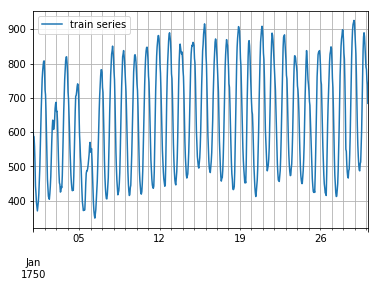

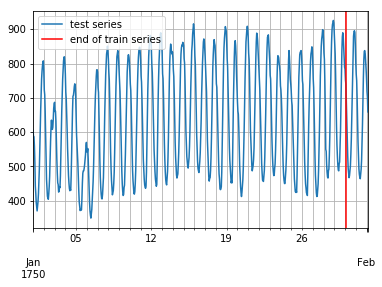

In [8]:
# train data
entry=next(iter(dataset.train))
train_series=to_pandas(entry)
train_series.plot()

plt.grid(which="both")
plt.legend(["train series"], loc="upper left")
plt.show()

# test data
entry = next(iter(dataset.test))
test_series=to_pandas(entry)
test_series.head()

test_series.plot()
plt.axvline(train_series.index[-1], color='r') # end of train dataset
plt.grid(which="both")
plt.legend(["test series", "end of train series"], loc="upper left")
plt.show()

## The model



In [22]:
dataset.metadata.prediction_length
dataset.metadata.prediction_length
24*7

168

In [24]:
from gluonts.model.deepar import DeepAREstimator
from gluonts.trainer import Trainer

# define estimator
estimator=DeepAREstimator(
    freq=dataset.metadata.freq,
    prediction_length=dataset.metadata.prediction_length,
    context_length=168,
    trainer=Trainer(epochs=100,
                    learning_rate=0.01,
                    num_batches_per_epoch=100
                   )    
    
)


INFO:root:Using CPU
INFO:root:Using CPU


In [25]:
%%time

# train predictor
predictor=estimator.train(dataset.train)

INFO:root:Start model training
INFO:root:Number of parameters in DeepARTrainingNetwork: 13463
INFO:root:Epoch[0] Learning rate is 0.01
100%|██████████| 100/100 [01:14<00:00,  1.34it/s, avg_epoch_loss=4.99]
INFO:root:Epoch[0] Elapsed time 74.472 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=4.985488
INFO:root:Epoch[1] Learning rate is 0.01
100%|██████████| 100/100 [01:10<00:00,  1.42it/s, avg_epoch_loss=4.01]
INFO:root:Epoch[1] Elapsed time 70.671 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=4.013342
INFO:root:Epoch[2] Learning rate is 0.01
100%|██████████| 100/100 [01:10<00:00,  1.42it/s, avg_epoch_loss=3.73]
INFO:root:Epoch[2] Elapsed time 70.503 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=3.725940
INFO:root:Epoch[3] Learning rate is 0.01
100%|██████████| 100/100 [01:18<00:00,  1.28it/s, avg_epoch_loss=3.73]
INFO:root:Epoch[3] Elapsed time 78.299 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=3.727226
INFO:root:Epoch[4] Learning rate i

100%|██████████| 100/100 [00:56<00:00,  1.78it/s, avg_epoch_loss=2.97]
INFO:root:Epoch[36] Elapsed time 56.164 seconds
INFO:root:Epoch[36] Evaluation metric 'epoch_loss'=2.966076
INFO:root:Epoch[37] Learning rate is 0.005
100%|██████████| 100/100 [00:55<00:00,  1.79it/s, avg_epoch_loss=3.06]
INFO:root:Epoch[37] Elapsed time 55.950 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=3.062398
INFO:root:Epoch[38] Learning rate is 0.005
100%|██████████| 100/100 [00:57<00:00,  1.75it/s, avg_epoch_loss=2.82]
INFO:root:Epoch[38] Elapsed time 57.110 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=2.821247
INFO:root:Epoch[39] Learning rate is 0.005
100%|██████████| 100/100 [00:55<00:00,  1.80it/s, avg_epoch_loss=2.85]
INFO:root:Epoch[39] Elapsed time 55.713 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=2.846970
INFO:root:Epoch[40] Learning rate is 0.005
100%|██████████| 100/100 [00:55<00:00,  1.79it/s, avg_epoch_loss=2.92]
INFO:root:Epoch[40] Elapsed time 55.830 s

INFO:root:Epoch[72] Evaluation metric 'epoch_loss'=2.755008
INFO:root:Loading parameters from best epoch (62)
INFO:root:Epoch[73] Learning rate is 0.00125
100%|██████████| 100/100 [00:37<00:00,  2.64it/s, avg_epoch_loss=2.7]
INFO:root:Epoch[73] Elapsed time 37.902 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=2.704497
INFO:root:Epoch[74] Learning rate is 0.00125
100%|██████████| 100/100 [00:38<00:00,  2.61it/s, avg_epoch_loss=2.41]
INFO:root:Epoch[74] Elapsed time 38.369 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=2.410950
INFO:root:Epoch[75] Learning rate is 0.00125
100%|██████████| 100/100 [00:39<00:00,  2.51it/s, avg_epoch_loss=2.64]
INFO:root:Epoch[75] Elapsed time 39.858 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=2.638609
INFO:root:Epoch[76] Learning rate is 0.00125
100%|██████████| 100/100 [00:37<00:00,  2.64it/s, avg_epoch_loss=2.51]
INFO:root:Epoch[76] Elapsed time 37.950 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=2.50

Wall time: 2h 5min 42s


In [35]:
%%time 

from gluonts.evaluation.backtest import make_evaluation_predictions
from gluonts.evaluation import Evaluator

forecast_it, ts_it = make_evaluation_predictions(
    dataset.test, predictor=predictor, num_eval_samples=100
)


Wall time: 1e+03 µs


In [41]:
evaluator = Evaluator()
agg_metrics, item_metrics = evaluator(
    iter(ts_it),
    iter(forecast_it),
    num_series=len(dataset.test)
)

Running evaluation: 100%|██████████| 414/414 [01:23<00:00,  4.93it/s]


In [42]:
print(json.dumps(agg_metrics, indent=4))

{
    "MSE": 188753329.11266816,
    "abs_error": 36924048.732008934,
    "abs_target_sum": 145558863.59960938,
    "abs_target_mean": 7324.822041043147,
    "seasonal_error": 336.9046924038302,
    "MASE": 2.204002758354511,
    "sMAPE": 0.12058489981072779,
    "MSIS": 45.968846697947114,
    "QuantileLoss[0.1]": 44003455.19936838,
    "Coverage[0.1]": 0.38873792270531426,
    "QuantileLoss[0.2]": 46329913.5187748,
    "Coverage[0.2]": 0.4734299516908212,
    "QuantileLoss[0.3]": 44735377.371630855,
    "Coverage[0.3]": 0.5406099033816426,
    "QuantileLoss[0.4]": 41466735.0633049,
    "Coverage[0.4]": 0.5961654589371983,
    "QuantileLoss[0.5]": 36924048.472940445,
    "Coverage[0.5]": 0.651016505636071,
    "QuantileLoss[0.6]": 31268344.419712067,
    "Coverage[0.6]": 0.6961553945249601,
    "QuantileLoss[0.7]": 24996583.719441798,
    "Coverage[0.7]": 0.752214170692432,
    "QuantileLoss[0.8]": 17997316.936382674,
    "Coverage[0.8]": 0.8080213365539453,
    "QuantileLoss[0.9]": 1